In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from votekit import PreferenceProfile
import pickle
from votekit.plots import profile_mentions_plot, multi_bar_plot, profile_ballot_lengths_plot
from votekit.elections import STV
from votekit.utils import first_place_votes, mentions
from votekit.graphs import PairwiseComparisonGraph
from votekit.matrices import matrix_heatmap, boost_matrix, candidate_distance_matrix, comentions_matrix
from io import BytesIO
import geopandas as gpd

In [2]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/Portland_profile_for_visualization.pkl') as response:
    profile = pickle.load(response)

In [3]:
profile

Profile has been cleaned
Profile contains rankings: True
Maximum ranking length: 6
Profile contains scores: False
Candidates: ('Cayle Tern', 'Candace Avalos', 'Doug Clove', 'Noah Ernst', 'Steph Routh', 'Jamie Dunphy', 'Thomas Shervey', 'Michael (Mike) Sands', 'Timur Ender', 'David Linn', 'Peggy Sue Owens', 'Loretta Smith', 'Joe Furi', 'Uncertified Write In', 'Terrence Hayes', 'Deian Salazar', 'Joe Allen')
Candidates who received votes: ('Candace Avalos', 'Cayle Tern', 'Jamie Dunphy', 'Loretta Smith', 'Steph Routh', 'Doug Clove', 'Michael (Mike) Sands', 'David Linn', 'Timur Ender', 'Deian Salazar', 'Peggy Sue Owens', 'Joe Allen', 'Joe Furi', 'Terrence Hayes', 'Noah Ernst', 'Thomas Shervey', 'Uncertified Write In')
Total number of Ballot objects: 19872
Total weight of Ballot objects: 42871

In [4]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/Portland_election_for_visualization.pkl') as response:
    election = pickle.load(response)

In [5]:
election

                          Status  Round
Candace Avalos           Elected     13
Loretta Smith            Elected     16
Jamie Dunphy             Elected     17
Terrence Hayes        Eliminated     15
Noah Ernst            Eliminated     14
Steph Routh           Eliminated     12
Timur Ender           Eliminated     11
Doug Clove            Eliminated     10
Peggy Sue Owens       Eliminated      9
David Linn            Eliminated      8
Joe Allen             Eliminated      7
Michael (Mike) Sands  Eliminated      6
Deian Salazar         Eliminated      5
Cayle Tern            Eliminated      4
Thomas Shervey        Eliminated      3
Joe Furi              Eliminated      2
Uncertified Write In  Eliminated      1

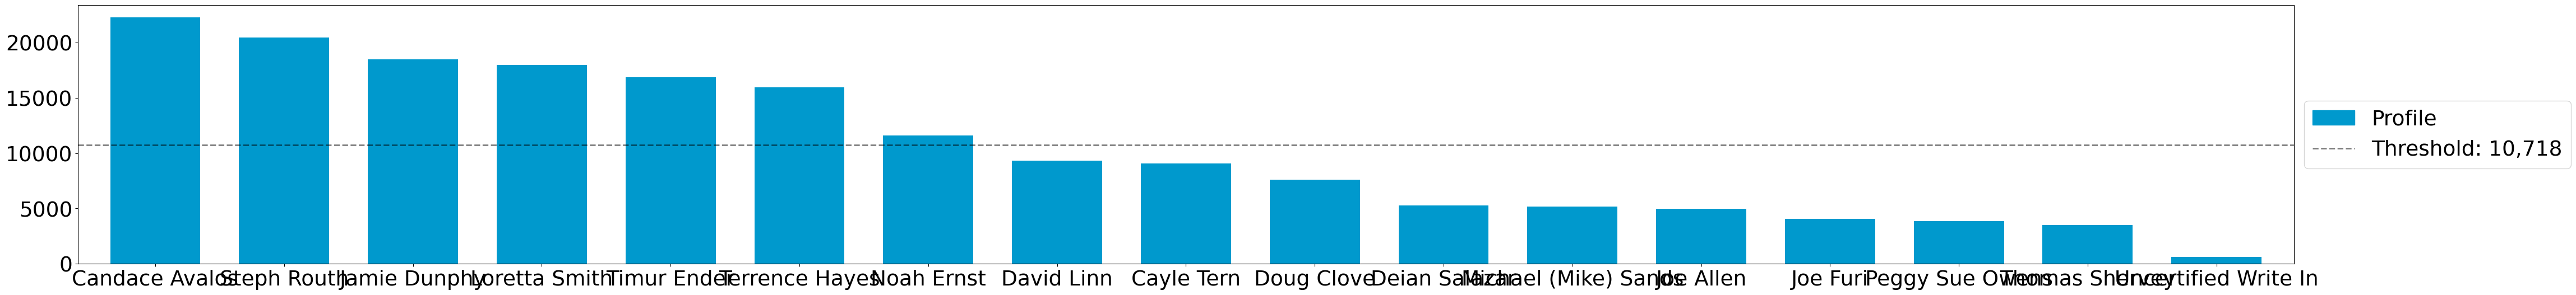

In [6]:
ax = profile_mentions_plot(
    profile, 
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
    show_profile_legend=True
)

# Try it yourself!

Your task is to do each of the following (preferably in order and with only one modification):

1. Edit the axis names
2. Try normalizing the data
3. Change the color of the bars
4. Change the width of the bars
5. Change the order of the bars
6. Try relabeling the candidates with integers
7. Change the legend font size
8. Play around with the legend location

Parameters for `profile_mentions_plot`:

- profile (PreferenceProfile): Profile to plot statistics for.
- profile_label (str, optional): Label for profile. Defaults to "Profile".
- mentions_kwds (dict[str, Any], optional): Keyword arguments to pass to
    ``mentions``. Defaults to None, in which case default values for ``mentions``
    are used.
- normalize (bool, optional): Whether or not to normalize data. Defaults to False.
- profile_color (str, optional): Color to plot. Defaults to the first color from
    ``COLOR_LIST`` from ``utils`` module.
- bar_width (float, optional): Width of bars. Defaults to None which computes the bar width
    as 0.7 divided by the number of data sets. Must be in the interval :math:`(0,1]`.
- candidate_ordering (list[str], optional): Ordering of x-labels. Defaults to decreasing
    order of mentions.
- x_axis_name (str, optional): Name of x-axis. Defaults to None, which does not plot a name.
- y_axis_name (str, optional): Name of y-axis. Defaults to None, which does not plot a name.
- title (str, optional): Title for the figure. Defaults to None, which does not plot a title.
- show_profile_legend (bool, optional): Whether or not to plot the profile legend.
    Defaults to False. Is automatically shown if any threshold lines have the keyword
    "label" passed through ``threshold_kwds``.
- candidate_legend (dict[str, str], optional): Dictionary mapping candidates
    to alternate label. Defaults to None. If provided, generates a second legend.
- relabel_candidates_with_int (bool, optional): Relabel the candidates with integer labels.
    Defaults to False. If ``candidate_legend`` is passed, those labels supercede.
- threshold_values (Union[list[float], float], optional): List of values to plot horizontal
    lines at. Can be provided as a list or a single float.
- threshold_kwds (Union[list[dict], dict], optional): List of plotting
    keywords for the horizontal lines. Can be a list or single dictionary. These will be
    passed to plt.axhline(). Common keywords include "linestyle", "linewidth", and "label".
    If "label" is passed, automatically plots the data set legend with the labels.
- legend_font_size (float, optional): The font size to use for the legend. Defaults to 10.0
    + the number of categories.
- legend_loc (str, optional): The location parameter to pass to ``Axes.legend(loc=)``.
    Defaults to "center left".
- legend_bbox_to_anchor (Tuple[float, float], otptional): The bounding box to anchor
    the legend to. Defaults to (1, 0.5).
- ax (Axes, optional): A matplotlib axes object to plot the figure on. Defaults to None, in
    which case the function creates and returns a new axes. The figure height is 6 inches
    and the figure width is 3 inches times the number of categories.




# Some quick on Matplotlib

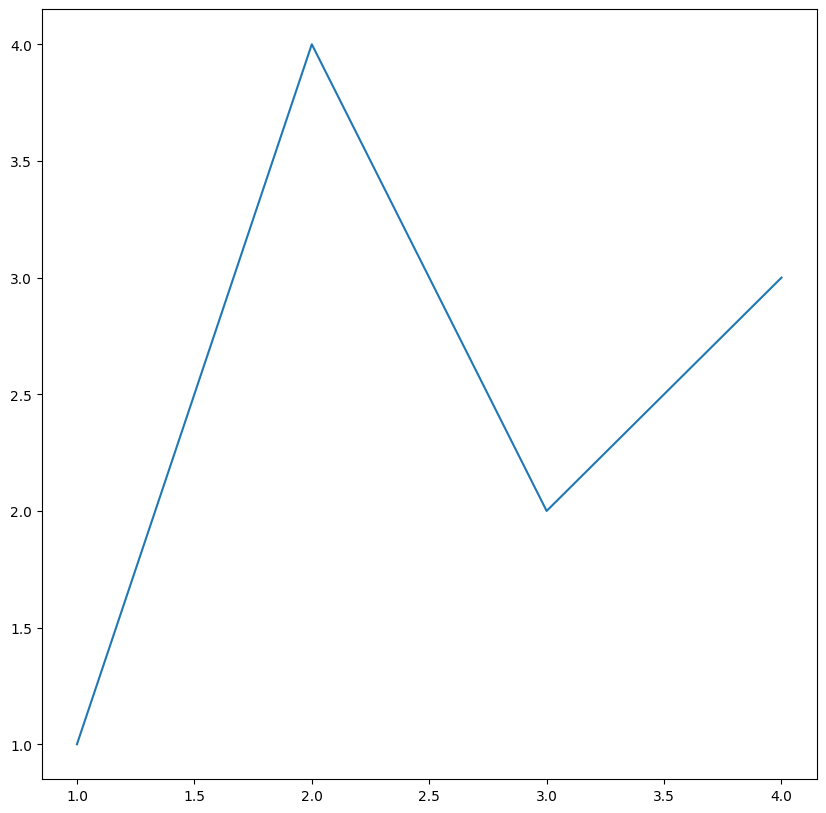

In [21]:
fig, ax = plt.subplots(figsize = (10,10))             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

![image](https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/parts_of_a_figure.webp)

# Try it yourself!

1. Use `fig, ax = plt.subplots(figsize=(<pick a size>))` to create a figure and axes object. make sure to play around with different figure sizes to see how they affect the plot.
2. Use `ax.spines[<side>].set_visible(False)` to hide some of the spines of the plot.
3. Use `ax.yticks(rotation=<pick a rotation>)` to rotate the y-axis ticks and make them easier to read.
3. Use `ax.set_yscale(<scale>)` to change the scale of the y-axis. [Documentation](https://matplotlib.org/stable/users/explain/quick_start.html#scales)
4. Use `fig, ax = plt.subplots(figsize=(<pick a size>), nrows=2)` and plot two different histogrames on the same figure. [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)

### Filtering to viable candidates

In [7]:
mentions_dict = mentions(profile)
viable_cands = [c for c, mentions in mentions_dict.items() if mentions >= election.threshold]

viable_cands = sorted(viable_cands, reverse=True, key = lambda x: mentions_dict[x])
print("Viable candidates in decreasing order of mentions")

for i, cand in enumerate(viable_cands):
    print(i+1, cand)

Viable candidates in decreasing order of mentions
1 Candace Avalos
2 Steph Routh
3 Jamie Dunphy
4 Loretta Smith
5 Timur Ender
6 Terrence Hayes
7 Noah Ernst


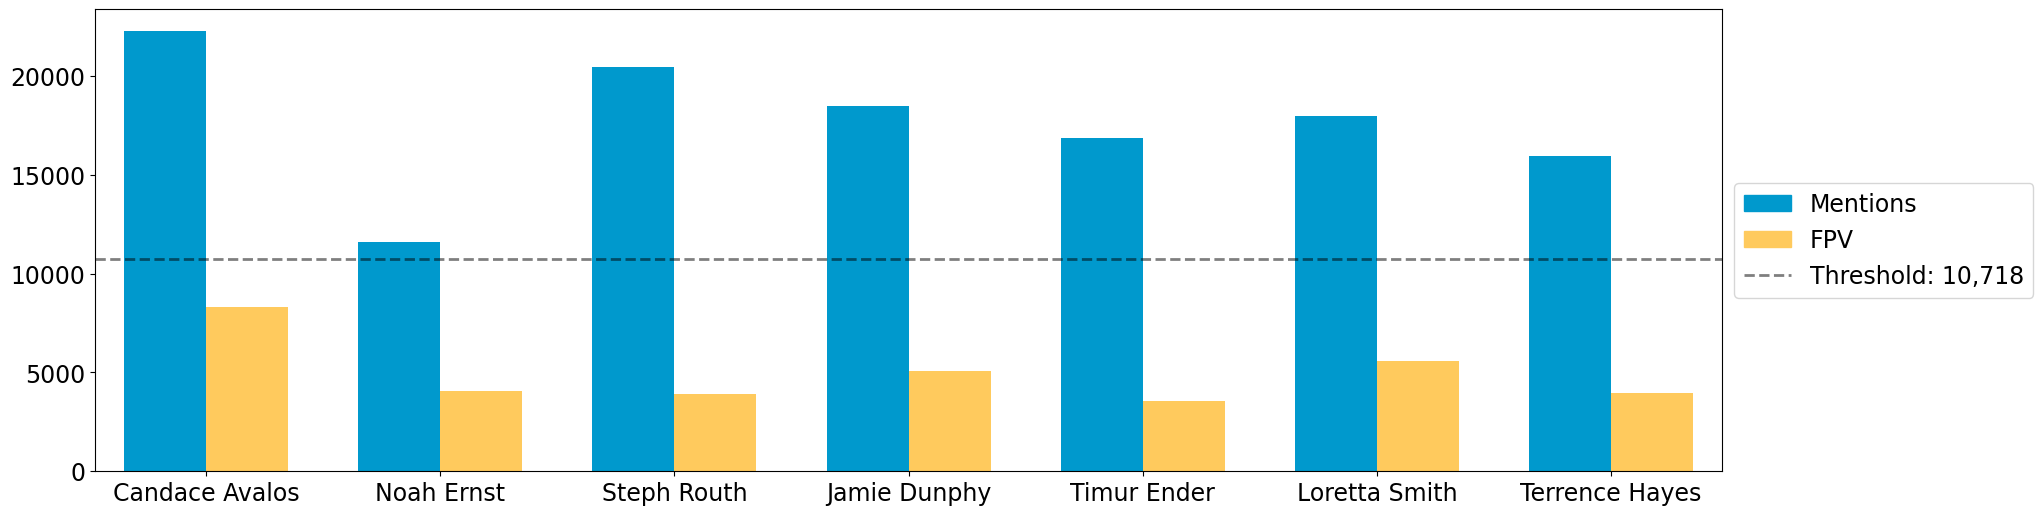

In [8]:
viable_cands_mentions = {cand:mentions for cand, mentions in mentions_dict.items() if cand in viable_cands}
viable_cands_fpv = {cand: fpv for cand, fpv in first_place_votes(profile).items() if cand in viable_cands}

ax = multi_bar_plot(
    data={"Mentions": viable_cands_mentions, "FPV": viable_cands_fpv},  
    threshold_values=election.threshold, 
    threshold_kwds={
        "label": f"Threshold: {election.threshold:,}", 
        "color":"black", 
        "linestyle": "--"
    },
)

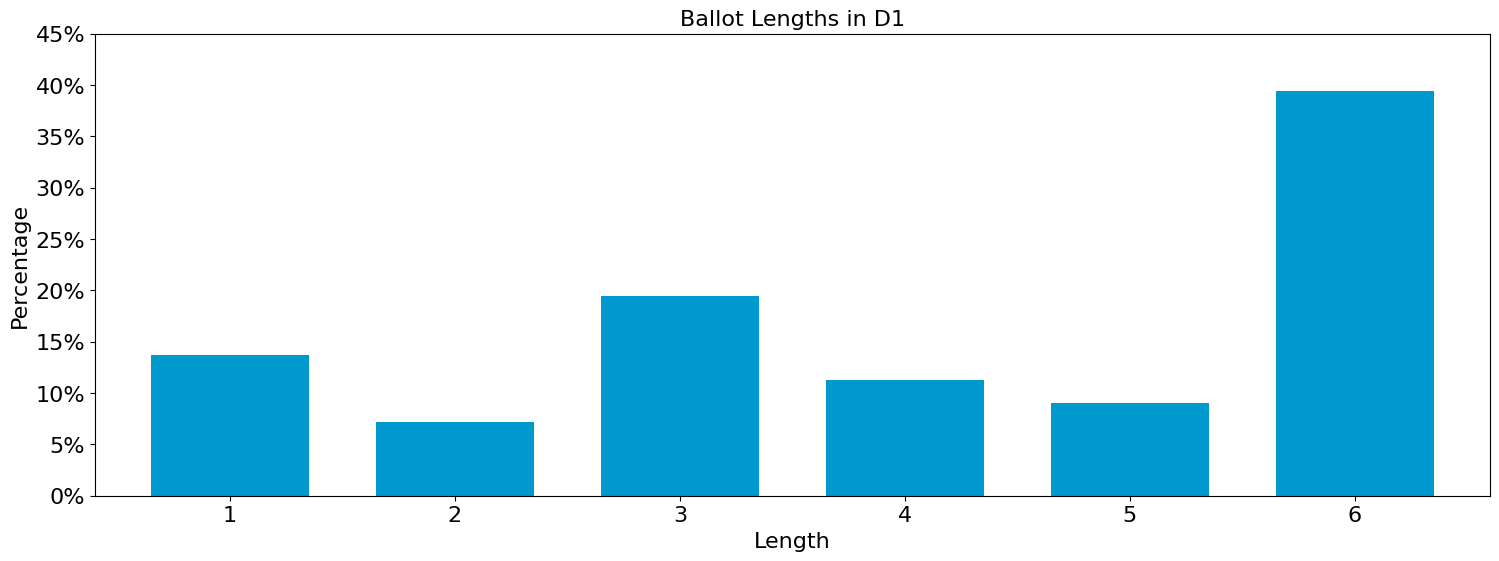

In [9]:
ax = profile_ballot_lengths_plot(profile, title="Ballot Lengths in D1", normalize=True, y_axis_name="Percentage", x_axis_name="Length")

# change the tick labels to percentages
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f"{float(x.get_text()):.0%}" for x in ax.get_yticklabels()])

plt.show()

# Pairwise Comparison Graph

In [10]:
pwcg = PairwiseComparisonGraph(profile)
dominating_tiers = pwcg.get_dominating_tiers()

print("The dominating tiers are: ")
for tier in dominating_tiers:
    print(tier)

if pwcg.has_condorcet_winner():
    print(f"\nThe Condorcet candidate is: {next(iter(dominating_tiers[0]))}")
else:
    print(f"\n There is no unique Condorcet winner. The top tier is {dominating_tiers[0]}")

The dominating tiers are: 
{'Candace Avalos'}
{'Steph Routh'}
{'Jamie Dunphy'}
{'Loretta Smith'}
{'Timur Ender'}
{'Terrence Hayes'}
{'Noah Ernst'}
{'Cayle Tern'}
{'David Linn'}
{'Doug Clove'}
{'Michael (Mike) Sands'}
{'Deian Salazar'}
{'Joe Allen'}
{'Joe Furi'}
{'Peggy Sue Owens'}
{'Thomas Shervey'}
{'Uncertified Write In'}

The Condorcet candidate is: Candace Avalos


<Axes: >

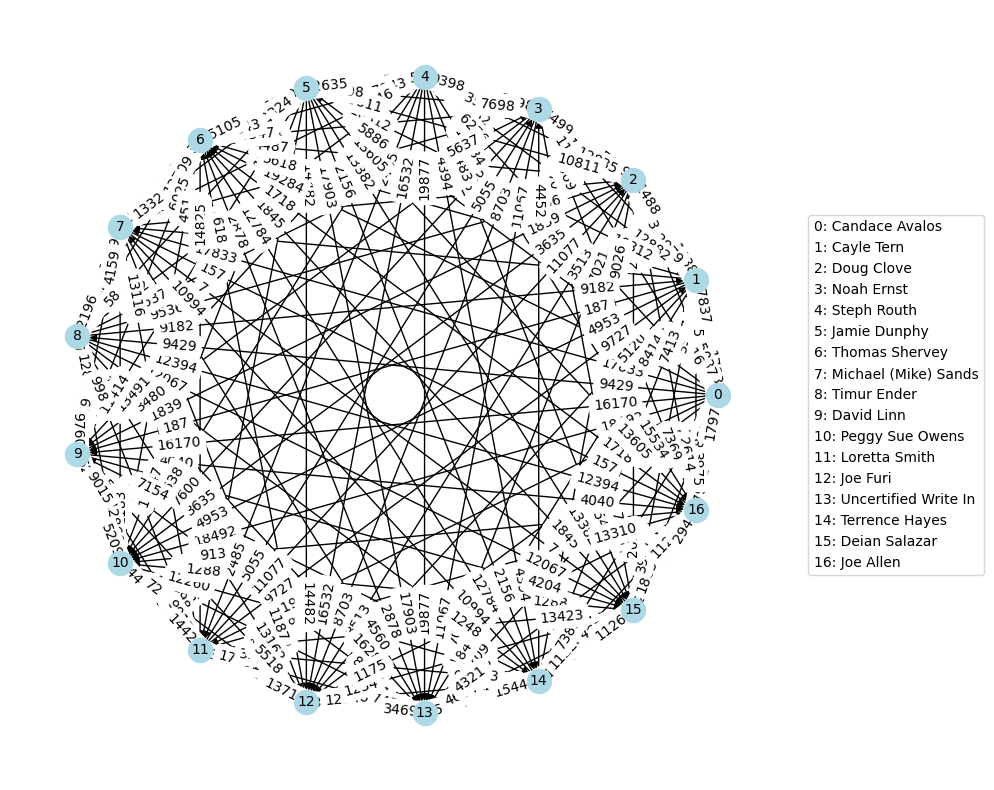

In [11]:
pwcg.draw()

<Axes: >

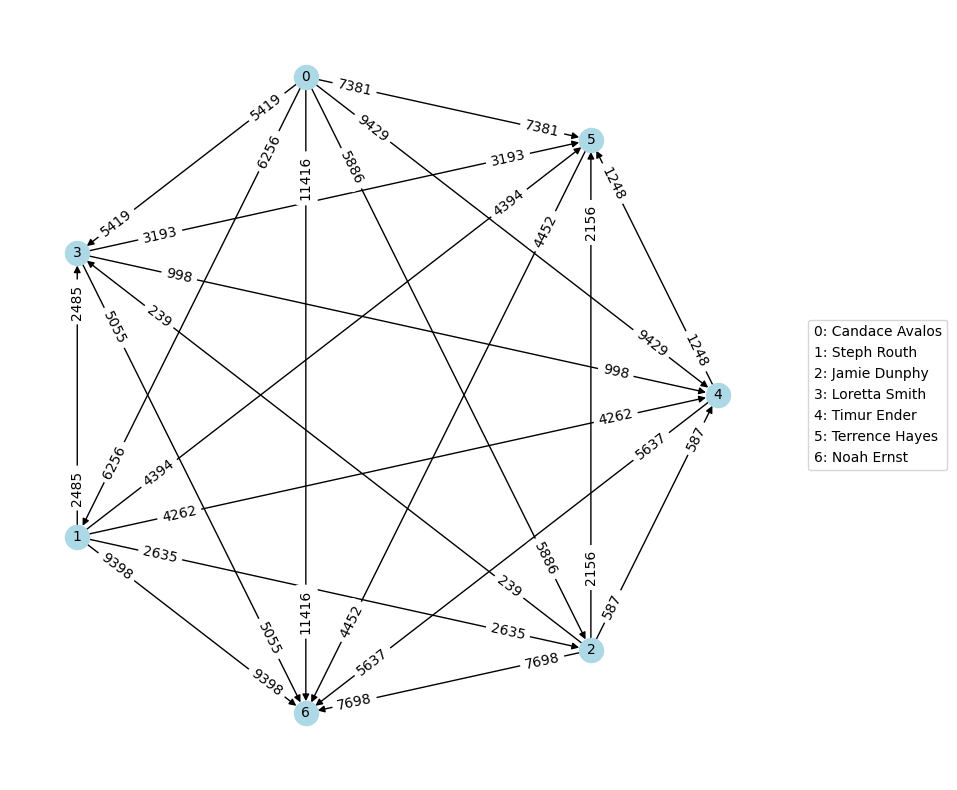

In [12]:
pwcg.draw(candidate_list = viable_cands) 

## Candidate Similarity

In [13]:

all_cands_sorted_by_mentions = sorted(profile.candidates, reverse=True, key = lambda x: mentions_dict[x])

# computes the matrix
bm  = boost_matrix(profile, candidates = all_cands_sorted_by_mentions)

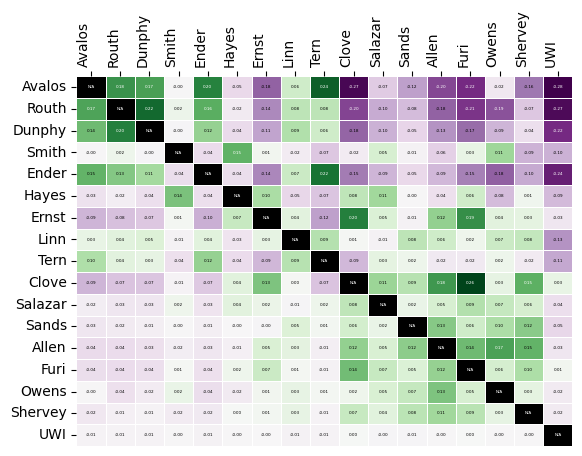

In [14]:
all_last_names = [name.split(" ")[-1] if "Write In" not in name else "UWI" for name in all_cands_sorted_by_mentions]

# plots the matrix
ax  = matrix_heatmap(
    bm, 
    row_labels=all_last_names, 
    column_labels=all_last_names,
    row_label_rotation = 0,
    column_label_rotation = 90
)

# Try it yourself!

Play around with the options for the matrix heatmap

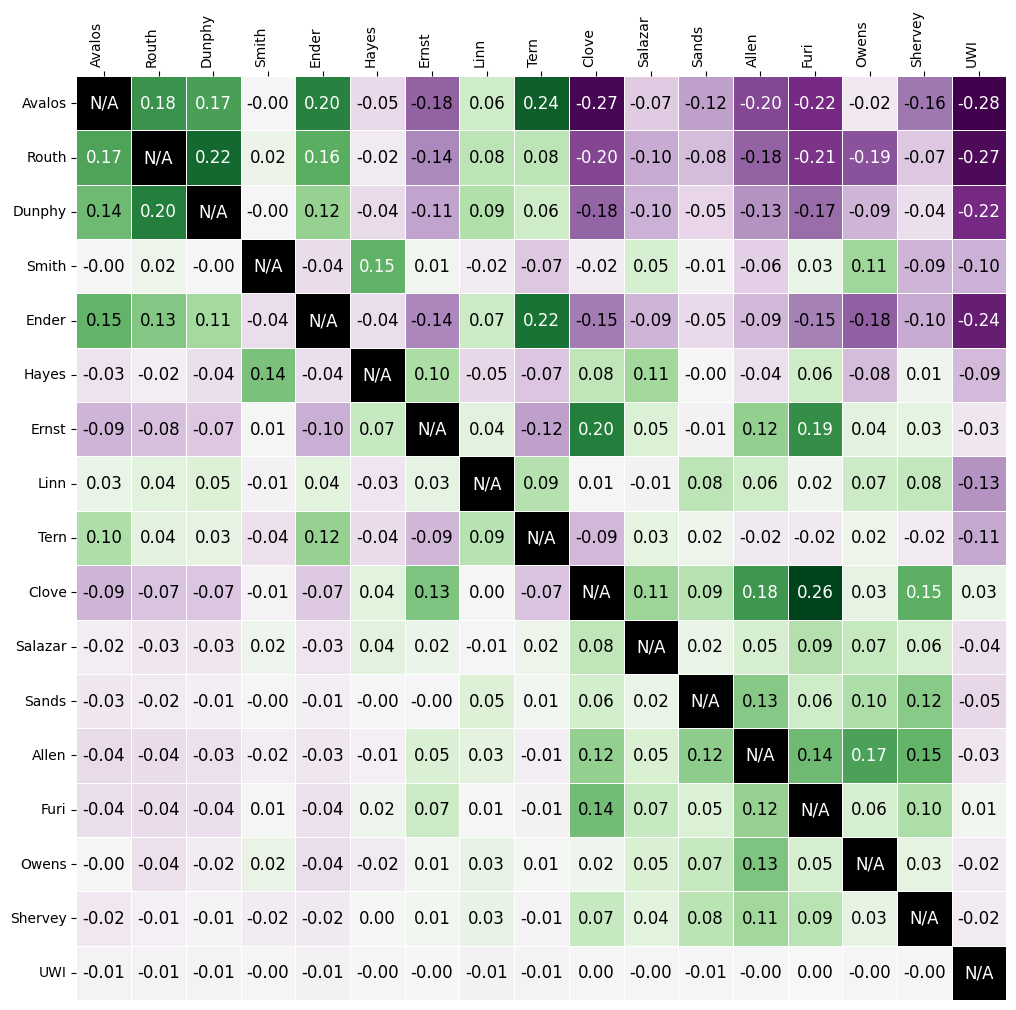

In [15]:
# Adjus the figure and font size
fig, ax = plt.subplots(figsize=(12,12))

ax  = matrix_heatmap(
    bm, 
    row_labels=all_last_names, 
    column_labels=all_last_names,
    row_label_rotation = 0,
    column_label_rotation = 90,
    ax = ax,
    cell_font_size = 12
)

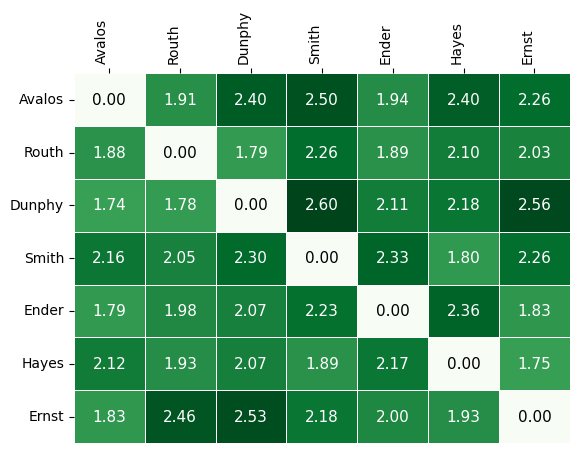

In [16]:

cdm  = candidate_distance_matrix(profile, candidates = viable_cands)

last_names_viable = [name.split(" ")[-1] for name in viable_cands]

ax  = matrix_heatmap(cdm, row_labels=last_names_viable, 
                        column_labels=last_names_viable,
                        row_label_rotation = 0,
                        column_label_rotation = 90)

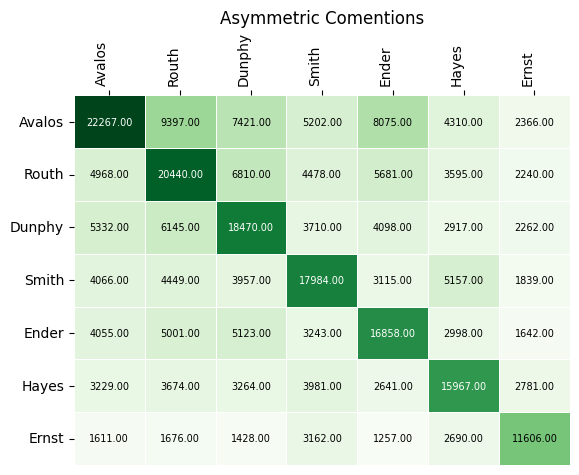

In [17]:
cmm_asym  = comentions_matrix(profile, candidates = viable_cands)
ax  = matrix_heatmap(
    cmm_asym, 
    row_labels=last_names_viable, 
    column_labels=last_names_viable,
    row_label_rotation = 0,
    column_label_rotation = 90
)

plt.title("Asymmetric Comentions") 
plt.show()

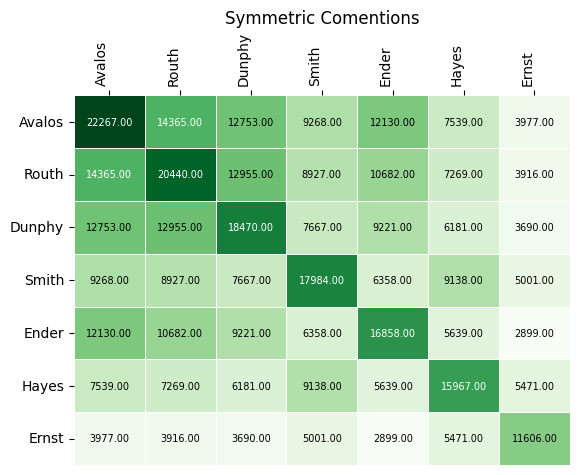

In [18]:
cmm_sym  = comentions_matrix(profile, candidates = viable_cands, symmetric=True)
ax  = matrix_heatmap(
    cmm_sym, 
    row_labels=last_names_viable, 
    column_labels=last_names_viable,
    row_label_rotation = 0,
    column_label_rotation = 90
)

plt.title("Symmetric Comentions") 
plt.show()

## Choropleths

In [73]:
with urlopen('https://github.com/mggg/Training_Materials_25/raw/refs/heads/main/data/visualization/nc_viz_data.parquet') as response:
    data = response.read()
    buf = BytesIO(data)

# now GeoPandas/pyarrow can read it
gdf = gpd.read_parquet(buf)
gdf

,path,white_pop_20,other_pop_20,amin_pop_20,asian_nhpi_pop_20,hpop_20,bpop_20,total_pop_20,white_vap_20,other_vap_20,...,sen_22_dem,sen_20_rep,sen_20_dem,sen_16_rep,sen_16_dem,pres_20_rep,pres_20_dem,pres_16_rep,pres_16_dem,geometry
0,vtd:37025008-00,4802.0,33.0,111.0,27.0,126.0,219.0,5318.0,3888.0,19.0,...,472.0,2502.0,684.0,2091.0,529.0,2636.0,698.0,2139.0,519.0,"POLYGON ((544178.584 3919272.215, 544180.919 3..."
1,vtd:37081000G16,1539.0,9.0,22.0,18.0,36.0,61.0,1685.0,1219.0,7.0,...,745.0,491.0,792.0,553.0,668.0,449.0,851.0,477.0,697.0,"POLYGON ((603756.925 3992696.691, 603763.571 3..."
2,vtd:3719500PRTO,2791.0,16.0,79.0,40.0,407.0,1929.0,5262.0,2328.0,11.0,...,762.0,1478.0,1266.0,1359.0,1201.0,1576.0,1255.0,1414.0,1178.0,"POLYGON ((778343.935 3968574.59, 778344.546 39..."
3,vtd:37025001-10,2862.0,53.0,73.0,199.0,269.0,643.0,4099.0,2268.0,35.0,...,723.0,1217.0,1025.0,1182.0,768.0,1266.0,1118.0,1189.0,802.0,"POLYGON ((529192.348 3911013.541, 529324.208 3..."
4,vtd:37025001-07,2551.0,30.0,61.0,550.0,183.0,511.0,3886.0,2007.0,20.0,...,649.0,1440.0,824.0,1319.0,591.0,1463.0,880.0,1295.0,632.0,"POLYGON ((531840.803 3908214.534, 531940.197 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,vtd:37185000007,347.0,1.0,28.0,12.0,91.0,676.0,1155.0,303.0,0.0,...,257.0,172.0,393.0,143.0,410.0,194.0,385.0,143.0,415.0,"POLYGON ((747324.767 4016190.367, 747387.655 4..."
2662,vtd:37185000002,821.0,6.0,21.0,8.0,23.0,270.0,1149.0,737.0,5.0,...,216.0,409.0,288.0,351.0,250.0,424.0,287.0,363.0,247.0,"POLYGON ((759296.946 4036764.5, 759298.398 403..."
2663,vtd:37185000004,389.0,1.0,18.0,8.0,33.0,647.0,1096.0,320.0,1.0,...,252.0,228.0,374.0,197.0,377.0,244.0,362.0,205.0,372.0,"POLYGON ((743988.193 4046929.686, 744002.568 4..."
2664,vtd:370630053-1,2601.0,69.0,27.0,459.0,280.0,1020.0,4456.0,2130.0,56.0,...,1709.0,545.0,2160.0,606.0,1838.0,490.0,2261.0,467.0,1904.0,"POLYGON ((683921.73 3976836.092, 683925.555 39..."


<Axes: >

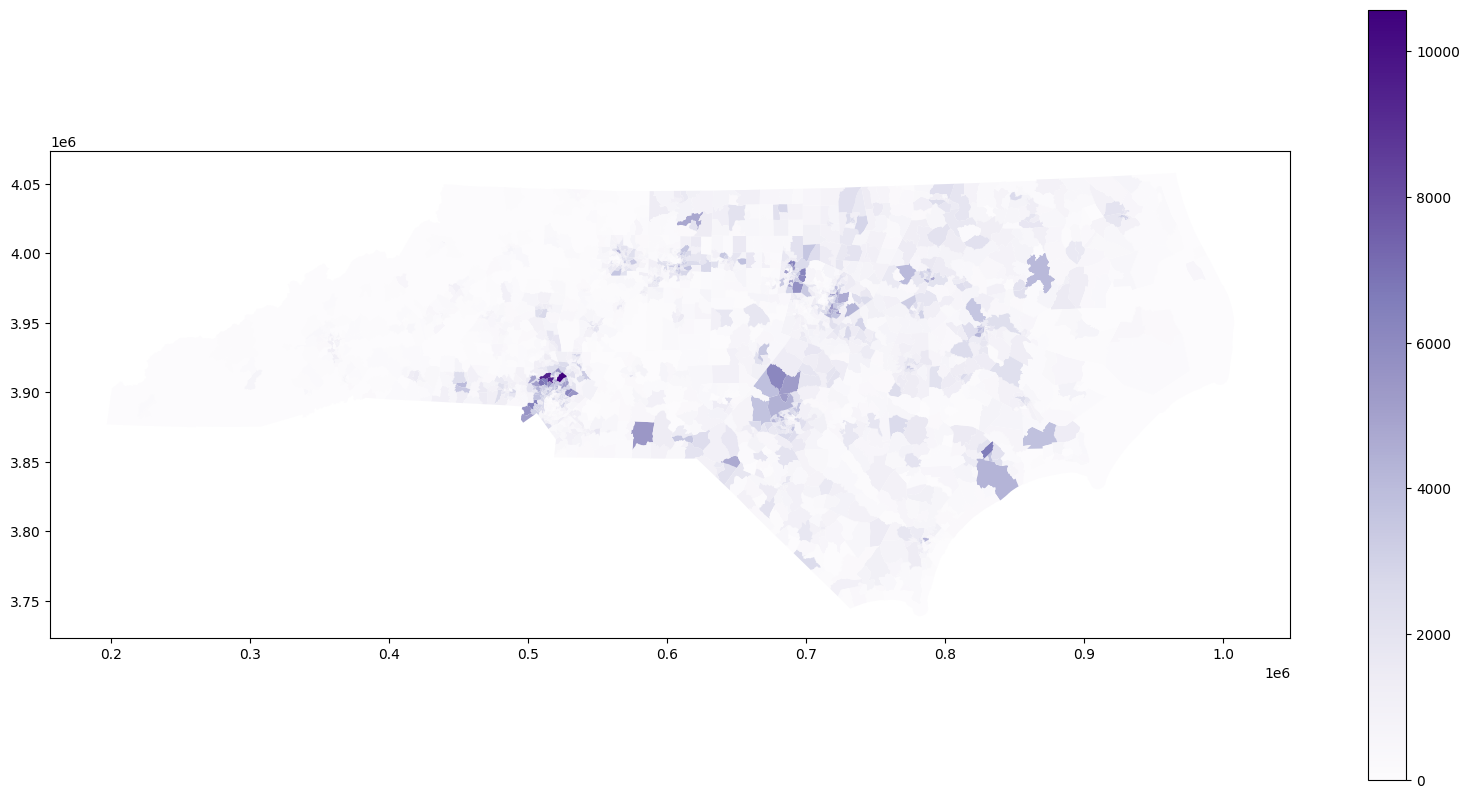

In [74]:
fig, ax = plt.subplots(figsize=(20, 10))
gdf.plot(ax=ax, column='bpop_20', legend=True, cmap='Purples')

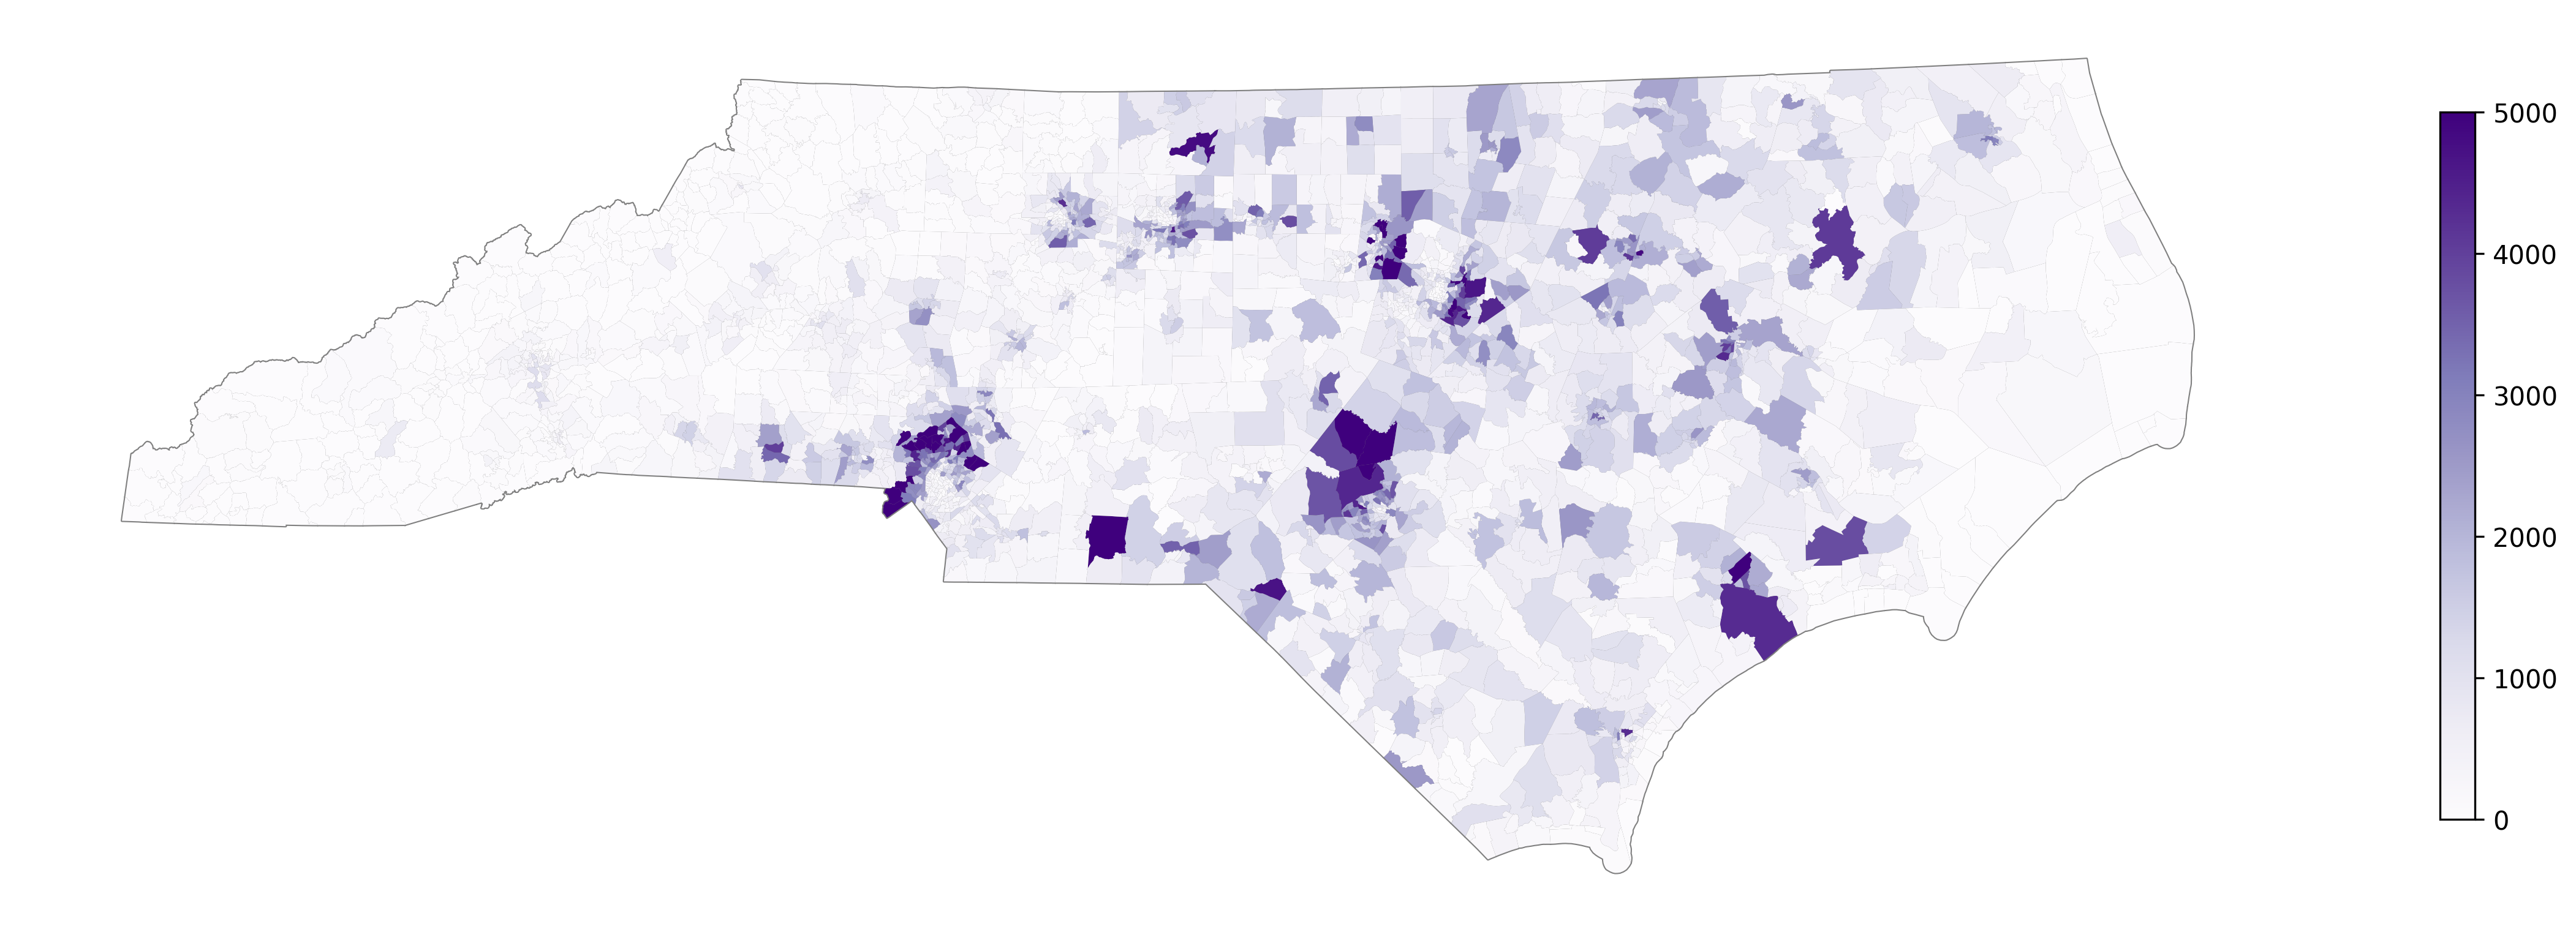

In [78]:
# DPI (dots per inch) controls the resolution of the figure
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
gdf.plot(
    ax=ax,
    edgecolor='grey',
)

lower, upper = 0, 5_000
gdf.plot(
    column='bpop_20',
    cmap='Purples',
    legend=True,
    vmin=lower,
    vmax=upper,
    ax=ax,
    legend_kwds={
        "shrink": 0.5
    },
)

ax.spines[:].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()